### Question1

In [1]:
import numpy as np

In [2]:
a = np.random.randint(1,20,(15)) #using random and randint function to create a random vector with random numbers
print(a)

[11 19  8 14  3  8 19  4  3 17 14 14  7 10 16]


In [3]:
a = a.reshape(3,5) #reshaping vector into 3 by 5 array
print(a)

[[11 19  8 14  3]
 [ 8 19  4  3 17]
 [14 14  7 10 16]]


In [4]:
for i in a:
    i[np.where(i==i.max())]=0 #replaced max values of each row with 0
print(a)

[[11  0  8 14  3]
 [ 8  0  4  3 17]
 [14 14  7 10  0]]


### Question2

In [5]:
import pandas as p

In [6]:
data = p.read_csv('data.csv') #reading csv file using pandas. data.csv is kept in the same folder
data.head(20)

,Duration,Pulse,Maxpulse,Calories
0,60,110,130,409.1
1,60,117,145,479.0
2,60,103,135,340.0
3,45,109,175,282.4
4,45,117,148,406.0
5,60,102,127,300.0
6,60,110,136,374.0
7,45,104,134,253.3
8,30,109,133,195.1
9,60,98,124,269.0


In [7]:
data.describe() #basic desciption of the data

,Duration,Pulse,Maxpulse,Calories
count,169.000000,169.000000,169.000000,164.000000
mean,63.846154,107.461538,134.047337,375.790244
std,42.299949,14.510259,16.450434,266.379919
min,15.000000,80.000000,100.000000,50.300000
25%,45.000000,100.000000,124.000000,250.925000
50%,60.000000,105.000000,131.000000,318.600000
75%,60.000000,111.000000,141.000000,387.600000
max,300.000000,159.000000,184.000000,1860.400000


In [8]:
data.isnull() #checking for null values in data

,Duration,Pulse,Maxpulse,Calories
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
164,False,False,False,False
165,False,False,False,False
166,False,False,False,False
167,False,False,False,False


In [9]:
column_means = data.mean()
print(column_means)

Duration     63.846154
Pulse       107.461538
Maxpulse    134.047337
Calories    375.790244
dtype: float64


In [10]:
data = data.fillna(column_means) #filling the null values with mean value
data.head(20)

,Duration,Pulse,Maxpulse,Calories
0,60,110,130,409.100000
1,60,117,145,479.000000
2,60,103,135,340.000000
3,45,109,175,282.400000
4,45,117,148,406.000000
5,60,102,127,300.000000
6,60,110,136,374.000000
7,45,104,134,253.300000
8,30,109,133,195.100000
9,60,98,124,269.000000


In [11]:
result = data.groupby(['Pulse','Duration']).agg({'Maxpulse': ['mean', 'min','max', 'count'],'Pulse': ['mean', 'min', 'max', 'count']})
print(result) #printing min,max,count,mean of duration and pulse 

               Maxpulse                  Pulse                
                   mean  min  max count   mean  min  max count
Pulse Duration                                                
80    15          100.0  100  100     1   80.0   80   80     1
      30          120.0  120  120     1   80.0   80   80     1
83    20          107.0  107  107     1   83.0   83   83     1
85    30          120.0  120  120     1   85.0   85   85     1
90    30          113.5  107  120     2   90.0   90   90     2
...                 ...  ...  ...   ...    ...  ...  ...   ...
151   20          168.0  168  168     1  151.0  151  151     1
      30          170.0  170  170     1  151.0  151  151     1
152   25          168.0  168  168     1  152.0  152  152     1
153   20          172.0  172  172     1  153.0  153  153     1
159   30          182.0  182  182     1  159.0  159  159     1

[94 rows x 8 columns]


In [12]:
filtered_data1=data[(data['Calories'] > 500) & (data['Calories'] < 1000)]#filtering dataframe with calories between 500 and 1000
print(filtered_data1)

     Duration  Pulse  Maxpulse  Calories
51         80    123       146     643.1
62        160    109       135     853.0
65        180     90       130     800.4
66        150    105       135     873.4
67        150    107       130     816.0
72         90    100       127     700.0
73        150     97       127     953.2
75         90     98       125     563.2
78        120    100       130     500.4
90        180    101       127     600.1
99         90     93       124     604.1
103        90     90       100     500.4
106       180     90       120     800.3
108        90     90       120     500.3


In [13]:
filtered_data2=data[(data['Calories'] > 500) & (data['Pulse'] < 100)]#filtering dataframe with calories >500 and pulse < 100
print(filtered_data2)

     Duration  Pulse  Maxpulse  Calories
65        180     90       130     800.4
70        150     97       129    1115.0
73        150     97       127     953.2
75         90     98       125     563.2
99         90     93       124     604.1
103        90     90       100     500.4
106       180     90       120     800.3
108        90     90       120     500.3


In [14]:
data_modified = data.loc[:, data.columns != 'Maxpulse']#creating new dataframe without Maxpulse
print(data_modified)

     Duration  Pulse  Calories
0          60    110     409.1
1          60    117     479.0
2          60    103     340.0
3          45    109     282.4
4          45    117     406.0
..        ...    ...       ...
164        60    105     290.8
165        60    110     300.0
166        60    115     310.2
167        75    120     320.4
168        75    125     330.4

[169 rows x 3 columns]


In [15]:
data.drop('Maxpulse', inplace=True, axis=1)#deleted the Maxpulse
print(data.dtypes)

Duration      int64
Pulse         int64
Calories    float64
dtype: object


In [16]:
data["Calories"] = data["Calories"].astype(float).astype(int) #changed the datatype of calories
print(data.dtypes)

Duration    int64
Pulse       int64
Calories    int32
dtype: object


AxesSubplot(0.125,0.125;0.775x0.755)


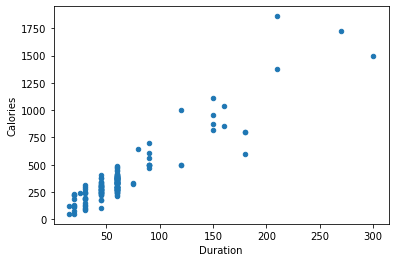

In [17]:
axis1 = data.plot.scatter(x='Duration',y='Calories')#created a scatter plot for the two columns (Duration and Calories).
print(axis1)

### Question3

In [18]:
import matplotlib.pyplot as plt
import numpy as np

In [19]:
y = np.array([22.2, 17.6, 8.8, 8, 7.7, 6.7])
mylabels = ["Java", "Python", "PHP", "JavaScript", "C#", "C++"]
myexplode = [0.2, 0, 0, 0,0,0]

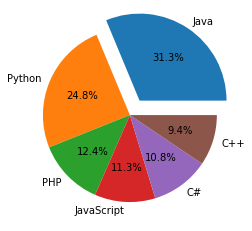

In [20]:
plt.pie(y,labels=mylabels, explode = myexplode,autopct='%1.1f%%')
plt.show()